number of run: 0
number of run: 1
number of run: 2
number of run: 3
number of run: 4
number of run: 5
number of run: 6
number of run: 7
number of run: 8
number of run: 9
number of run: 10
number of run: 11
number of run: 12
number of run: 13
number of run: 14
number of run: 15
number of run: 16
number of run: 17
number of run: 18
number of run: 19
number of run: 20
number of run: 21
number of run: 22
number of run: 23
number of run: 24
number of run: 25
number of run: 26
number of run: 27
number of run: 28
number of run: 29
number of run: 30
number of run: 31
number of run: 32
number of run: 33
number of run: 34
number of run: 35
number of run: 36
number of run: 37
number of run: 38
number of run: 39
number of run: 40
number of run: 41
number of run: 42
number of run: 43
number of run: 44
number of run: 45
number of run: 46
number of run: 47
number of run: 48
number of run: 49
number of run: 50
number of run: 51
number of run: 52
number of run: 53
number of run: 54
number of run: 55
nu

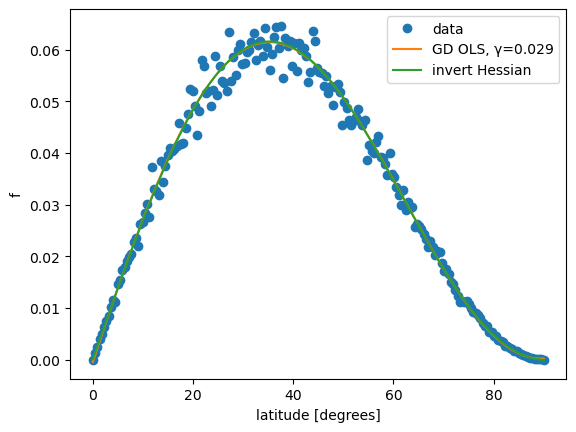

execution time= 4.1484832763671875e-05 s


In [3]:
# Importing various packages
import sys
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from random import random, seed
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#grid size
n = 200 

# Make data set.
x = np.linspace(0,(np.pi)/2,n).reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#polynomial fit
degree=6
poly = PolynomialFeatures(degree=degree)
X = poly.fit_transform(x)

# Hessian matrix
H = (2.0/n)* X.T @ X
invH = np.linalg.pinv(H)

# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)

Niterations = 1000000                                   

gamma = 0.029 #the value that gives the minimum MSE

niter=100

beta_OLS_iter=np.zeros(niter, dtype=object)
beta_inv_iter=np.zeros(niter, dtype=object)

for run in range(niter):#we run the code 100 times. We will settle on the average beta.
    #print('number of run:', run)

    #adding noise to the flux function
    y_noisy = np.random.normal(y, abs(y*0.05)) 

    beta_OLS = np.random.randn(degree+1,1)
    beta_inv = np.random.randn(degree+1,1)

    for iter in range(Niterations):
        gradient_OLS = (2.0/n)*X.T @ (X @ beta_OLS-y_noisy)
        gradient_inv = (2.0/n)*X.T @ (X @ beta_inv-y_noisy) #(I'm using the OLS gradient, because if I use the Ridge one, it overflows)
        beta_OLS -= gamma*gradient_OLS
        beta_inv -= invH @ gradient_inv
            
    #the final value of beta after all the iterrations
    beta_OLS_iter[run]=beta_OLS 
    beta_inv_iter[run]=beta_inv

#the mean value for the 100 runs
beta_OLS_final=np.mean(beta_OLS_iter)
beta_inv_final=np.mean(beta_inv_iter)

print('β OLS:', beta_OLS_final)
print('β inverse:', beta_inv_final)
        
y_OLS_GD = X @ beta_OLS_final    
y_inv = X @ beta_inv_final

MSE_OLS_GD= MSE(y_noisy, y_OLS_GD)
MSE_inv_GD= MSE(y_noisy, y_inv)
    
print('method MSE:',  MSE_OLS_GD)
print('inverse Hessian MSE:', MSE_inv_GD)

plt.figure()
plt.plot(x*180/np.pi, y_noisy, 'o', label='data')
plt.plot(x*180/np.pi, y_OLS_GD, label='GD OLS, γ=0.029')
plt.plot(x*180/np.pi, y_inv,  label='invert Hessian')
plt.xlabel('latitude [degrees]')
plt.ylabel('f')
plt.legend()
plt.show()

#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')